# WALRUS Sales Data Analysis for Optimization Potential

## 1. Introduction

This Jupyter notebook uses simulated sales data for the WALRUS art gallery. I did not use the real data to preserve the privacy of the artists. Artist names have been replaced with identification numbers. The simulated values are close approximations to the real sales trends I experienced while operating this gallery.

This notebook is designed for potential employers to assess my proficiency in data exploration and visualization.

## 2. Data Exploration and Cleaning

### 2.1 Importing Libraries and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

# Set the style for visualizations
sns.set(style="whitegrid")

In [2]:
# Load the 'WALRUS_soldinventory.csv' dataset
file_path = 'WALRUS_soldinventory.csv'
df = pd.read_csv(file_path)

### 2.2 Preliminary Data Examination

In [3]:
# Display basic statistics
print("Number of rows and columns:", df.shape)
print("\nData types and missing values:")
print(df.info())

Number of rows and columns: (2721, 5)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date_Sold    2721 non-null   object
 1   Artist       2721 non-null   int64 
 2   Price        2721 non-null   int64 
 3   Intake_Date  2721 non-null   object
 4   ArtworkId    2721 non-null   object
dtypes: int64(2), object(3)
memory usage: 106.4+ KB
None


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Date_Sold      0
Artist         0
Price          0
Intake_Date    0
ArtworkId      0
dtype: int64


### 2.3 Exploratory Data Analysis (EDA)

In [5]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
             Artist        Price
count  2721.000000  2721.000000
mean     28.722528   211.658949
std      14.396965   379.782727
min       2.000000     8.000000
25%      17.000000    90.000000
50%      33.000000   140.000000
75%      41.000000   220.000000
max      52.000000  6625.000000


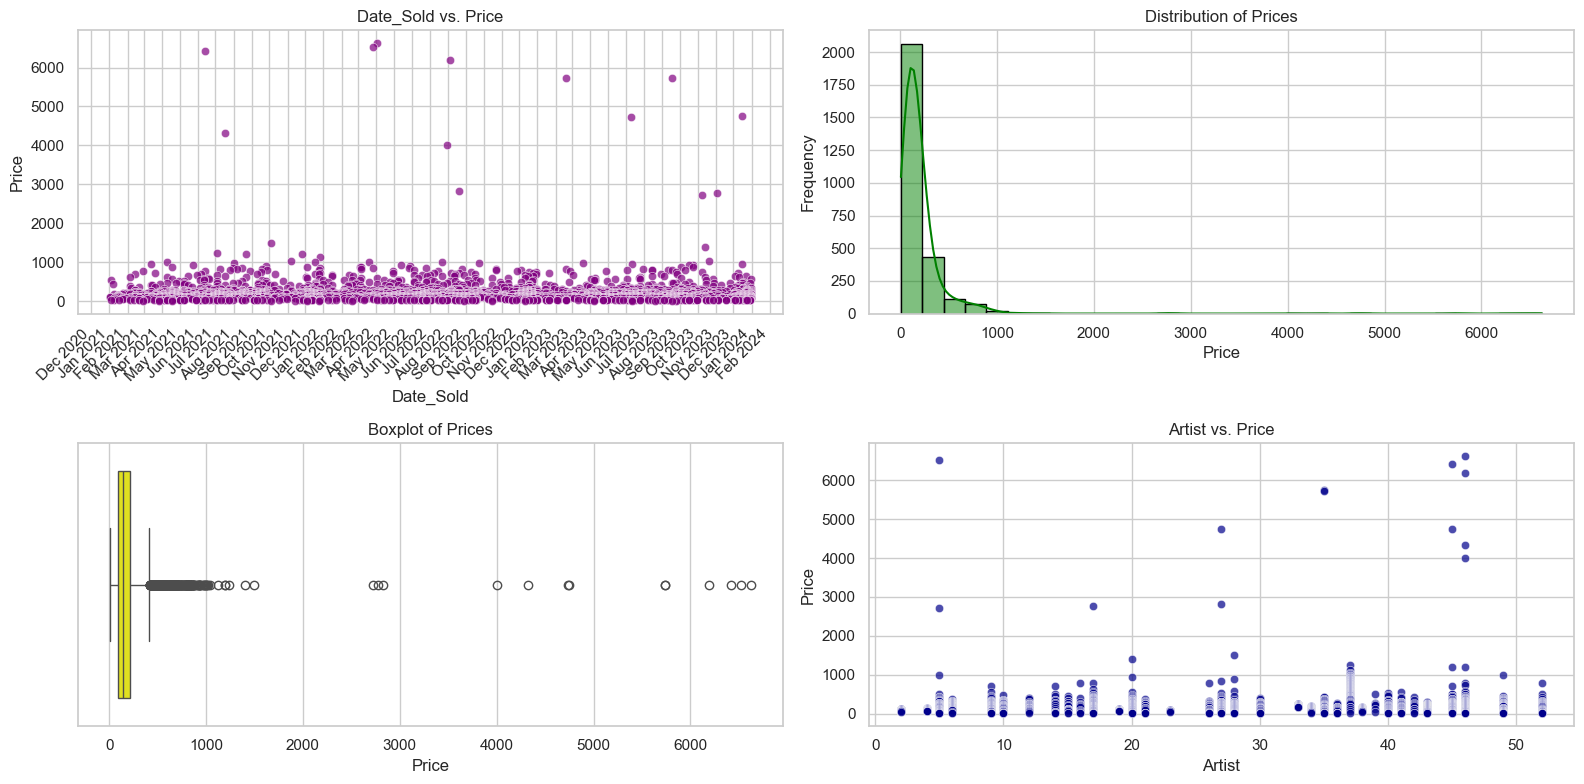

In [6]:
# Visualize distribution of key variables
plt.figure(figsize=(16, 8))

# Convert 'Date_Sold' to datetime format
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'])

# Date_Sold vs. Price (Sampling for better visualization)
plt.subplot(2, 2, 1)
sns.scatterplot(x='Date_Sold', y='Price', data=df, color='purple', alpha=0.7)
plt.title('Date_Sold vs. Price')
plt.xlabel('Date_Sold')
plt.ylabel('Price')

# Improve x-axis labels by grouping dates by month and year
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major locator to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as abbreviated month and year
# Distribution of Prices
plt.subplot(2, 2, 2)
sns.histplot(df['Price'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Boxplot of Prices
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Price'], color='yellow')
plt.title('Boxplot of Prices')
plt.xlabel('Price')

# Artist vs. Price
plt.subplot(2, 2, 4)
sns.scatterplot(x='Artist', y='Price', data=df, color='darkblue', alpha=0.7)
plt.title('Artist vs. Price')
plt.xlabel('Artist')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

### Results

The following code visualizes key variables in the dataset to provide insights into the distribution of prices and potential correlations. Let's break down the results:

##### Date\_Sold vs. Price
- **Insight:** No discernible correlation between the date of sale and artwork prices.
- **Visualization:** Scatter plot.

##### Distribution of Prices
- **Insight:** Peak in the smallest price range, with a steady decline as prices increase, particularly after \$1000.
- **Visualization:** Histogram.

##### Boxplot of Prices
- **Insight:** Presence of significant outliers on the high end, majority falling just above the top whisker, especially those exceeding \$6000.
- **Visualization:** Boxplot.

##### Artist vs. Price
- **Insight:** Only six artists sold artworks priced over \\\$2000, with most focusing on pieces under \\\$1000.
- **Visualization:** Scatter plot.

These visualizations offer valuable insights into the dataset's price distribution, potential outliers, and the pricing strategies of different artists.

## Section 3: Exploring Sales Patterns and Artist Performance
### 3.1 Sales Patterns Over Time
**Objective:** Investigate sales patterns over time and identify any trends or seasonality.

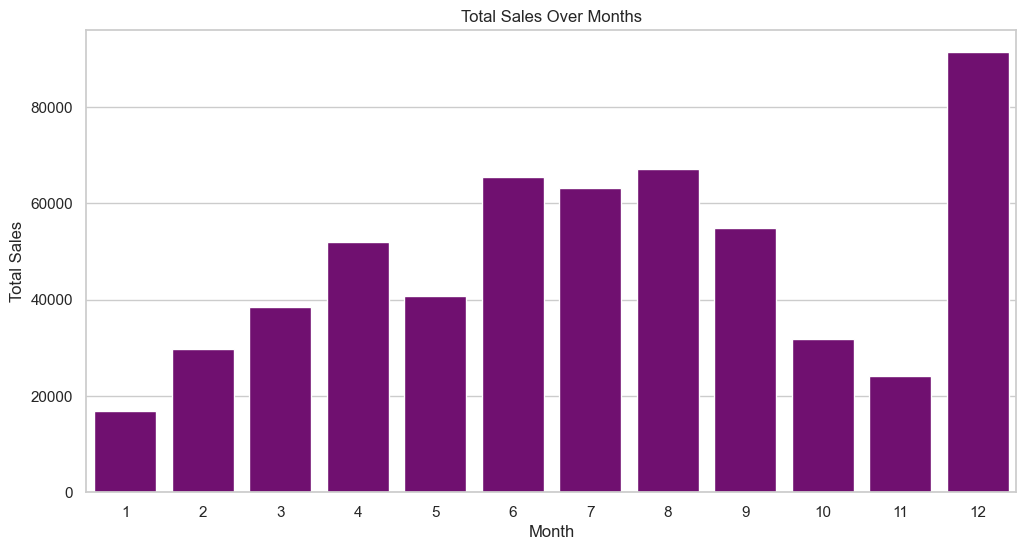

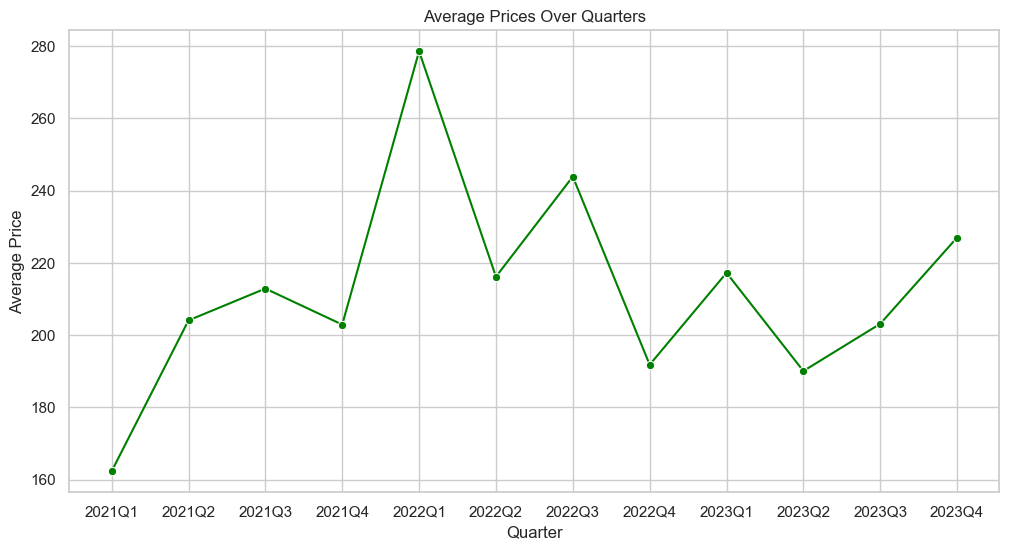

In [7]:
# Convert 'Date_Sold' to datetime format
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'])

# Extract month and quarter information
df['Month'] = df['Date_Sold'].dt.month
df['Quarter'] = df['Date_Sold'].dt.to_period("Q")

# Total Sales Over Months
plt.figure(figsize=(12, 6))
sales_over_months = df.groupby('Month')['Price'].sum()
sns.barplot(x=sales_over_months.index, y=sales_over_months, color='purple')
plt.title('Total Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Average Prices Over Quarters
plt.figure(figsize=(12, 6))
avg_prices_over_quarters = df.groupby('Quarter')['Price'].mean()
sns.lineplot(x=avg_prices_over_quarters.index.astype(str), y=avg_prices_over_quarters, marker='o', color='green')
plt.title('Average Prices Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Average Price')
plt.show()

### Results

The provided code extracts valuable insights from the dataset by transforming the 'Date_Sold' column into a datetime format and subsequently extracting month and quarter information. The resulting visualizations highlight key trends:

#### Total Sales Over Months
- **Insight:** A discernible pattern emerges, with sales starting below 2000 in January, steadily climbing to a peak in June with sales over 6000. There's a slight dip in July, but sales remain above 6000, followed by an increase in August. A consistent decline is observed from September to November, with November being the second-lowest, surpassed only by January. December stands out as the highest, exceeding 9000.
- **Visualization:** Bar chart.

#### Average Prices Over Quarters
- **Insight:** The trend in average prices over quarters aligns with the total sales pattern. The spike in 2022Q1 is noteworthy, indicating a significant increase in average prices during that period.
- **Visualization:** Line plot with markers.

These visualizations provide a comprehensive overview of sales trends, emphasizing the seasonality of sales and fluctuations in average prices over different quarters. The distinct patterns observed in both graphs offer actionable insights for strategic decision-making in inventory management and pricing strategies.


### 3.2 Artist Performance
**Objective:** Evaluate the performance of individual artists in terms of total sales and average prices.

In [8]:
# Get unique artists in the dataset
unique_artists = df['Artist'].unique()

# Create a color mapping for each artist
artist_color_mapping = {artist: sns.color_palette('viridis', n_colors=len(unique_artists))[i] for i, artist in enumerate(unique_artists)}

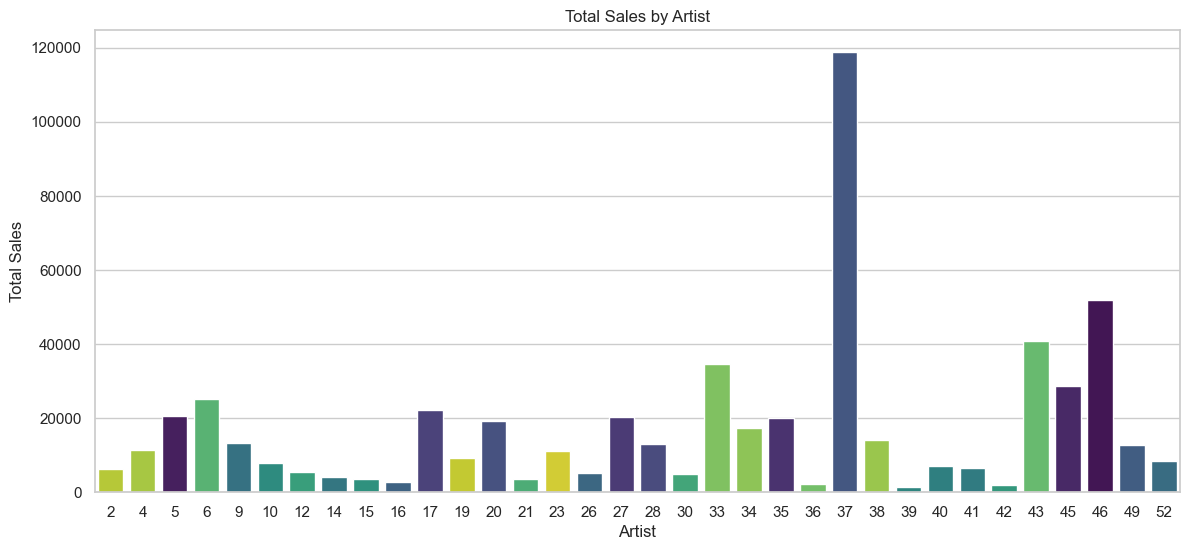

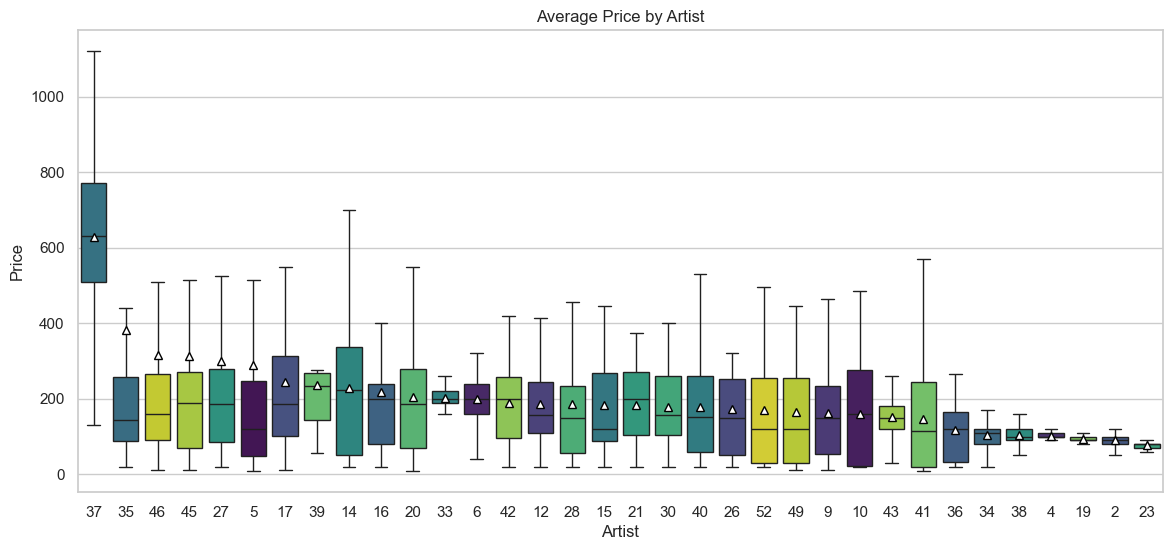

In [9]:
# Total Sales by Artist
plt.figure(figsize=(14, 6))
total_sales_by_artist = df.groupby('Artist')['Price'].sum().sort_values(ascending=False)
sns.barplot(x=total_sales_by_artist.index, y=total_sales_by_artist, hue=total_sales_by_artist.index, palette=[artist_color_mapping[artist] for artist in total_sales_by_artist.index], hue_order=total_sales_by_artist.index, legend=False)
plt.title('Total Sales by Artist')
plt.xlabel('Artist')
plt.ylabel('Total Sales')
plt.show()

# Average Price by Artist
plt.figure(figsize=(14, 6))
avg_prices_by_artist = df.groupby('Artist')['Price'].mean().sort_values(ascending=False)
sns.boxplot(x=df['Artist'], y=df['Price'], order=avg_prices_by_artist.index, hue=df['Artist'], palette=[artist_color_mapping[artist] for artist in avg_prices_by_artist.index], showfliers=False, showmeans=True, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, legend=False)
plt.title('Average Price by Artist')
plt.xlabel('Artist')
plt.ylabel('Price')
plt.show()

### Results
#### Total Sales by Artist
- **Insight:** Artist 37 emerges as the top performer, boasting total sales nearing \\\$120,000, significantly surpassing other artists. Artist 46 follows as the next highest with sales around \\\$50,000.
- **Visualization:** Bar chart with each artist's distinctive color.

#### Average Price by Artist
- **Insight:** Artist 37 stands out not only for the highest total sales but also for one of the largest price ranges, with the inner quartile surpassing the top whisker of most other artists. Artist 14 also exhibits a notable price range, while Artist 39's inner quartile near the top of their range suggests a focus on higher-priced artworks.
- **Visualization:** Boxplot with distinctive colors for each artist, highlighting their price distribution.

These visualizations offer a comprehensive understanding of individual artist contributions, emphasizing top performers and nuances in pricing strategies. This information is crucial for tailored inventory management and strategic decisions in optimizing sales based on artists' performance and pricing dynamics.


## 3. Revenue and Sales Analysis

### 3.1 Total Revenue Over Time

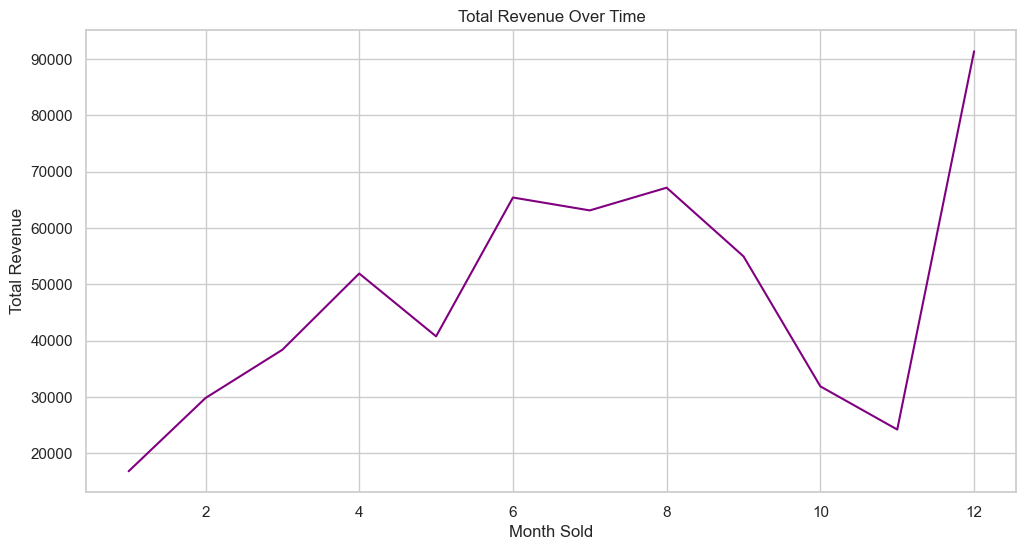

In [10]:
#Visualize the total revenue trend over the entire dataset
plt.figure(figsize=(12, 6))
total_revenue_over_time = df.groupby('Month')['Price'].sum()
total_revenue_over_time.plot(color='purple')
plt.title('Total Revenue Over Time')
plt.xlabel('Month Sold')
plt.ylabel('Total Revenue')
plt.show()

### 3.2 Artist Contribution to Revenue

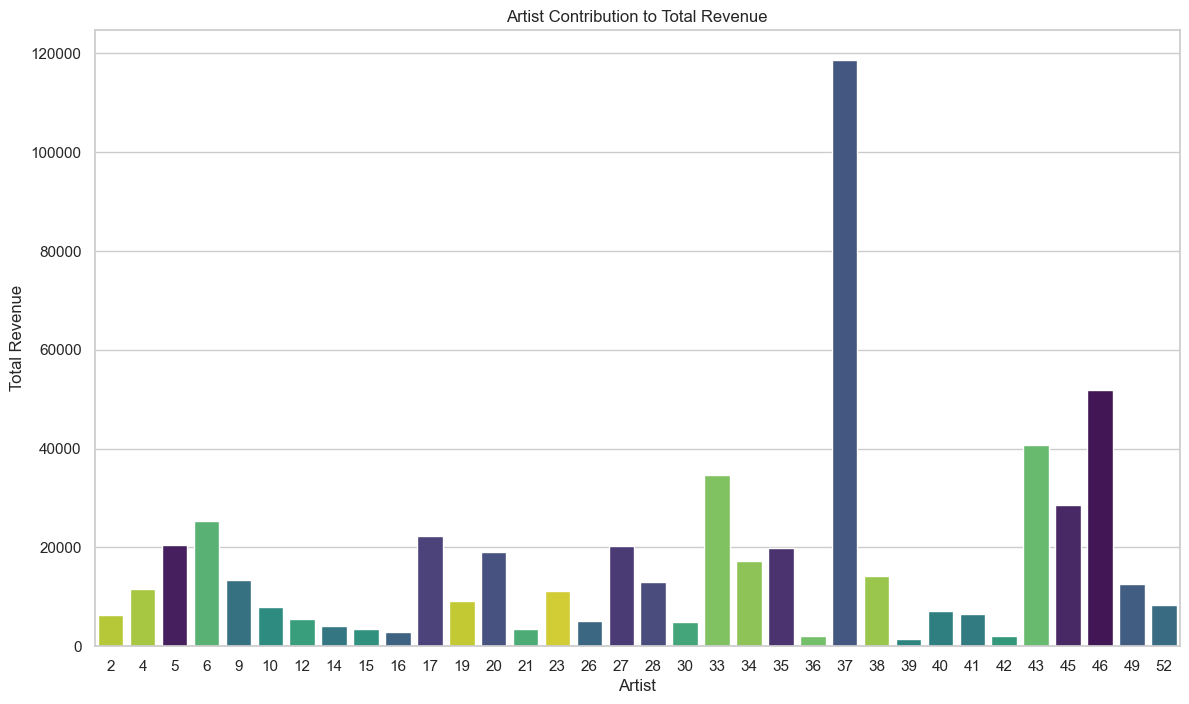

In [11]:
# Analyze the contribution of each artist to the total revenue
plt.figure(figsize=(14, 8))
artist_contribution = df.groupby('Artist')['Price'].sum().sort_values(ascending=False)
sns.barplot(x=artist_contribution.index, y=artist_contribution, hue=artist_contribution.index, palette=[artist_color_mapping[artist] for artist in artist_contribution.index], hue_order=artist_contribution.index, legend=False)
plt.title('Artist Contribution to Total Revenue')
plt.xlabel('Artist')
plt.ylabel('Total Revenue')
plt.show()


### 3.3 Average Price Analysis

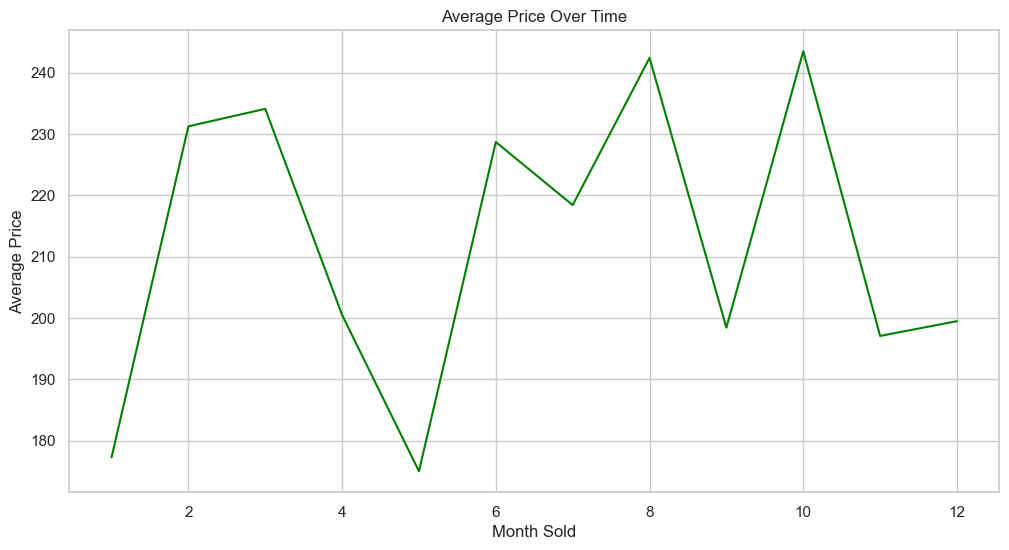

In [12]:
# Explore the average price trend over time
plt.figure(figsize=(12, 6))
average_price_over_time = df.groupby('Month')['Price'].mean()
average_price_over_time.plot(color='green')
plt.title('Average Price Over Time')
plt.xlabel('Month Sold')
plt.ylabel('Average Price')
plt.show()

## 4. Artist Performance Evaluation

### 4.1 Revenue and Sales Analysis by Artist

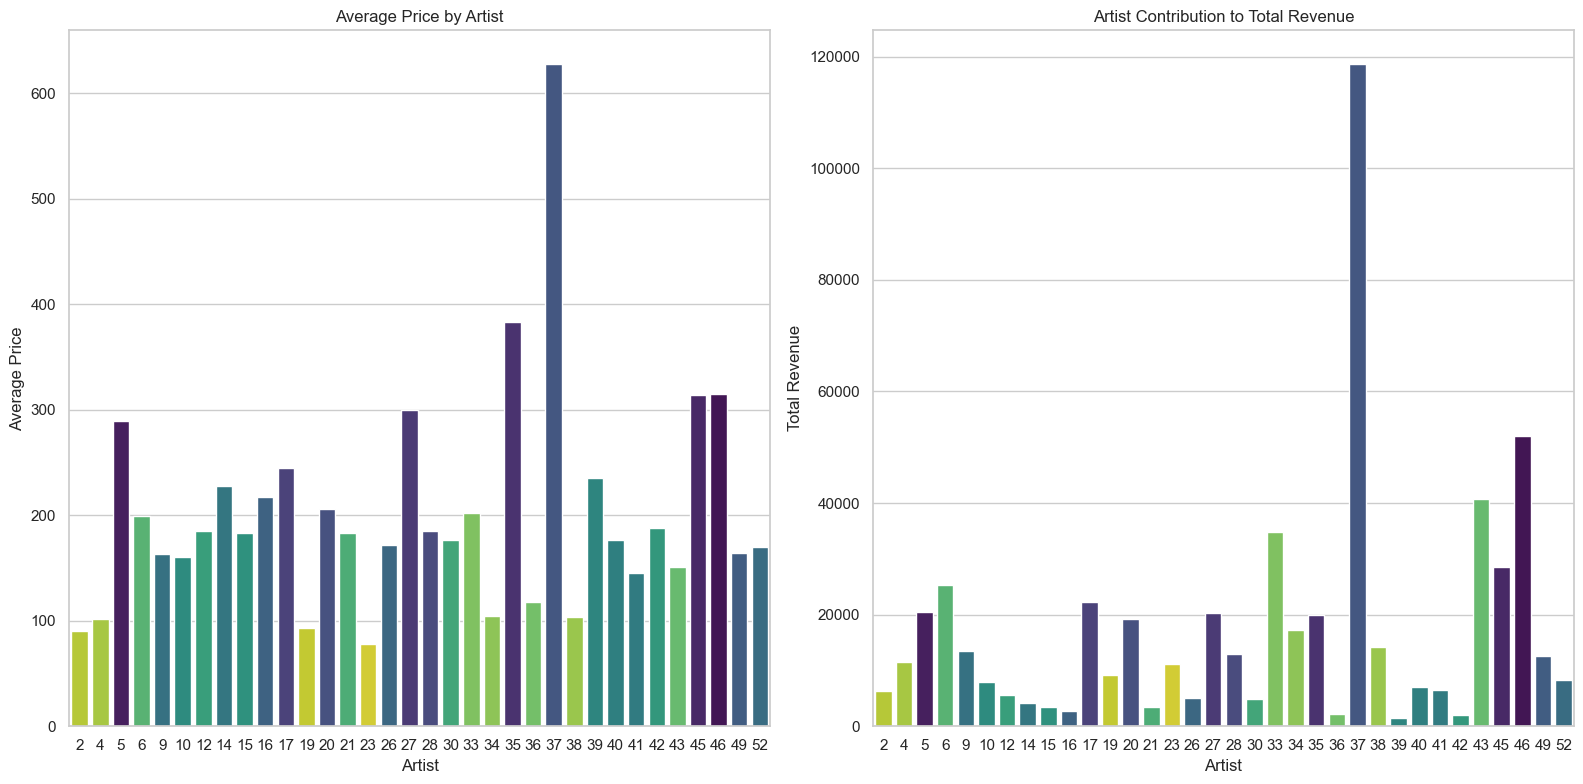

In [13]:
# Visualize the average price and contribution to total revenue by each artist
plt.figure(figsize=(16, 8))

# Bar plot for average price by artist
plt.subplot(1, 2, 1)
avg_price_by_artist = df.groupby('Artist')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_artist.index, y=avg_price_by_artist, hue=avg_price_by_artist.index, palette=[artist_color_mapping[artist] for artist in avg_price_by_artist.index], hue_order=avg_price_by_artist.index, legend=False)
plt.title('Average Price by Artist')
plt.xlabel('Artist')
plt.ylabel('Average Price')

# Bar plot for contribution to total revenue by artist
plt.subplot(1, 2, 2)
artist_contribution = df.groupby('Artist')['Price'].sum().sort_values(ascending=False)
sns.barplot(x=artist_contribution.index, y=artist_contribution, hue=artist_contribution.index, palette=[artist_color_mapping[artist] for artist in artist_contribution.index], hue_order=artist_contribution.index, legend=False)
plt.title('Artist Contribution to Total Revenue')
plt.xlabel('Artist')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()

### 4.2 Identify Top-Performing Artists

In [14]:
# Identify the top-performing artists based on total revenue
top_artists = artist_contribution.head(10)
print("Top-Performing Artists:")
print(top_artists)

Top-Performing Artists:
Artist
37    118760
46     51950
43     40690
33     34750
45     28560
6      25290
17     22267
5      20526
27     20375
35     19910
Name: Price, dtype: int64


## 5. Optimization Strategies for Inventory Management

### 5.1 Inventory Turnover Analysis

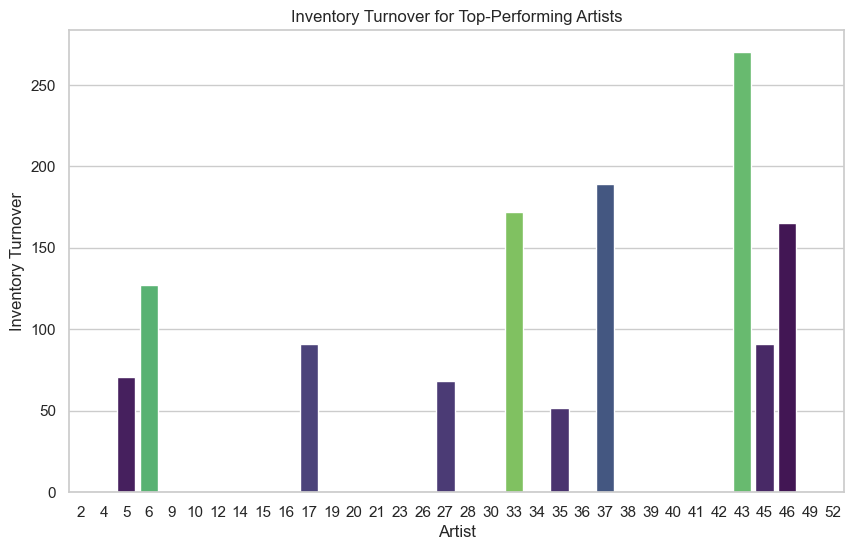

In [15]:
# Calculate and visualize inventory turnover for the top-performing artists
inventory_turnover = top_artists / avg_price_by_artist

plt.figure(figsize=(10, 6))
sns.barplot(x=inventory_turnover.index, y=inventory_turnover, palette=[artist_color_mapping[artist] for artist in inventory_turnover.index], hue=inventory_turnover.index)
plt.title('Inventory Turnover for Top-Performing Artists')
plt.xlabel('Artist')
plt.ylabel('Inventory Turnover')
plt.legend().set_visible(False)  # Hide legend
plt.show()

## 6. Days on Market Analysis:

Understanding the time it takes for artworks to sell (Days on Market) is crucial for optimizing inventory turnover. This analysis delves into the correlation between Days on Market, prices, artists, and seasonal trends, offering insights into tailored inventory management strategies.

### 6.1 Days on Market Distribuion:

Date_Sold      datetime64[ns]
Intake_Date            object
dtype: object
Date_Sold      datetime64[ns]
Intake_Date    datetime64[ns]
dtype: object


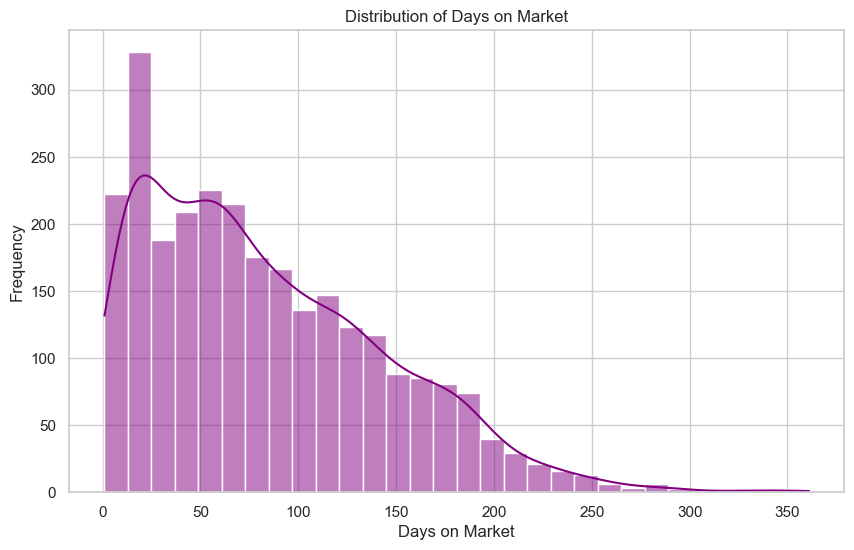

In [16]:
# Check data types of 'Date_Sold' and 'Intake_Date'
print(df[['Date_Sold', 'Intake_Date']].dtypes)

# Convert 'Intake_Date' to datetime type if it's not already
df['Intake_Date'] = pd.to_datetime(df['Intake_Date'], errors='coerce')

# Check again after conversion
print(df[['Date_Sold', 'Intake_Date']].dtypes)

# Calculate Days_on_Market by taking the difference between Date_Sold and Intake_Date
df['Days_on_Market'] = (df['Date_Sold'] - df['Intake_Date']).dt.days

# Visualizing the distribution of Days_on_Market
plt.figure(figsize=(10, 6))
sns.histplot(df['Days_on_Market'], bins=30, kde=True, color='purple')
plt.title('Distribution of Days on Market')
plt.xlabel('Days on Market')
plt.ylabel('Frequency')
plt.show()

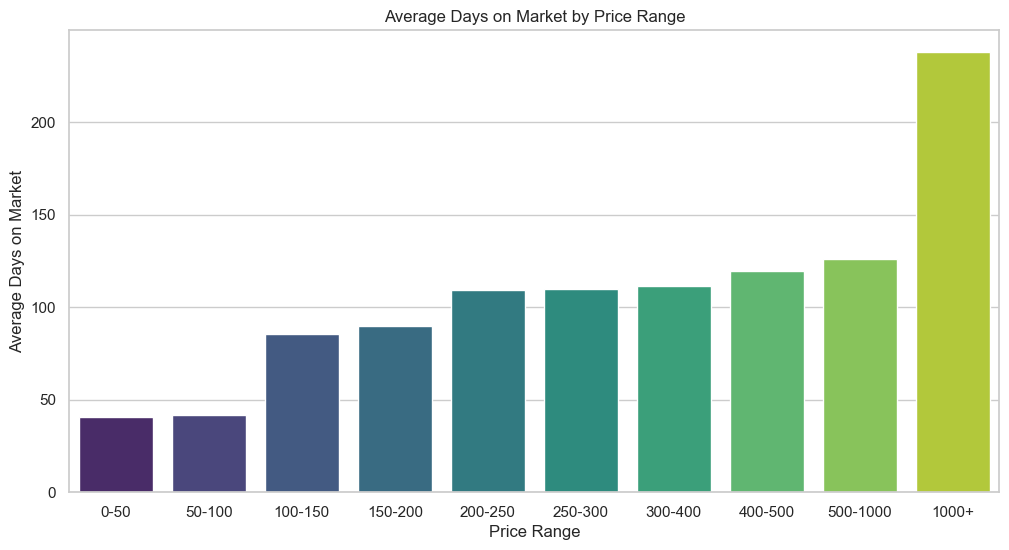

In [17]:
# Define custom price bins based on the data distribution
price_bins = [0, 50, 100, 150, 200, 250, 300, 400, 500, 1000, np.inf]
price_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-400', '400-500', '500-1000', '1000+']
df['Price_Range'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels, right=False)

# Calculate average Days_on_Market by the updated price range
price_range = df.groupby('Price_Range')['Days_on_Market'].mean().sort_values()

# Bar plot for Average Days on Market by the updated Price Range
plt.figure(figsize=(12, 6))
sns.barplot(x=price_range.index, y=price_range, palette='viridis', hue=price_range.index)
plt.title('Average Days on Market by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Days on Market')
plt.show()

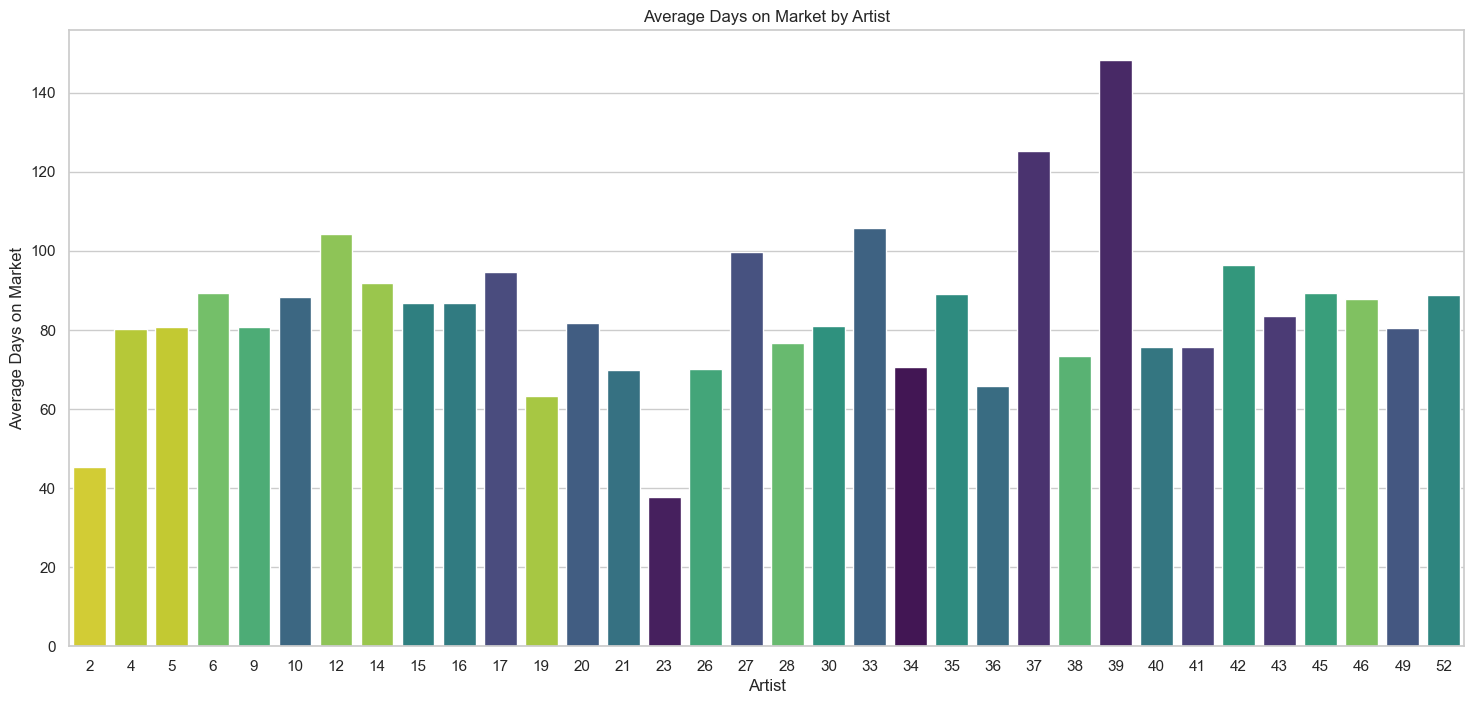

In [18]:
# Calculate average Days_on_Market by artist
artist_days_on_market = df.groupby('Artist')['Days_on_Market'].mean().sort_values()

plt.figure(figsize=(18, 8))
sns.barplot(x=artist_days_on_market.index, y=artist_days_on_market, hue=artist_days_on_market.index,
            palette=[artist_color_mapping[artist] for artist in artist_days_on_market.index], dodge=False)
plt.title('Average Days on Market by Artist')
plt.xlabel('Artist')
plt.ylabel('Average Days on Market')
plt.legend().set_visible(False)  # Hide legend
plt.show()

## 7. Correlation Analysis

### 7.1 Correlation between Price and Days on Market

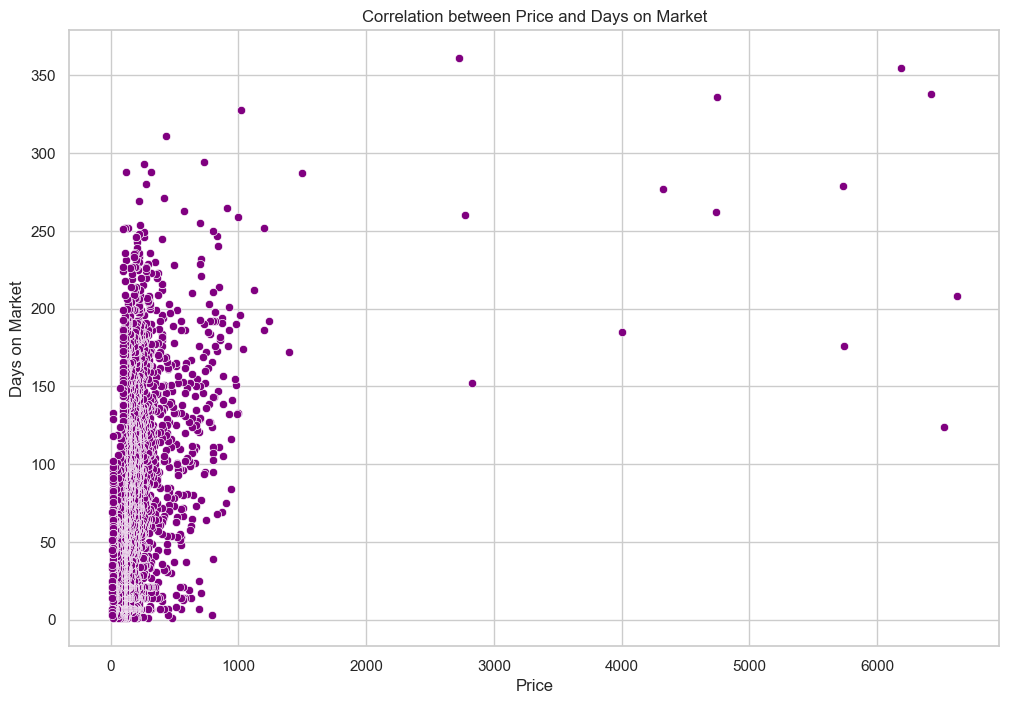

In [19]:
# Scatter plot to visualize the relationship between Price and Days_on_Market
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Price', y='Days_on_Market', data=df, color='purple')
plt.title('Correlation between Price and Days on Market')
plt.xlabel('Price')
plt.ylabel('Days on Market')
plt.show()

### 7.2 Correlation between Artist Contribution and Price

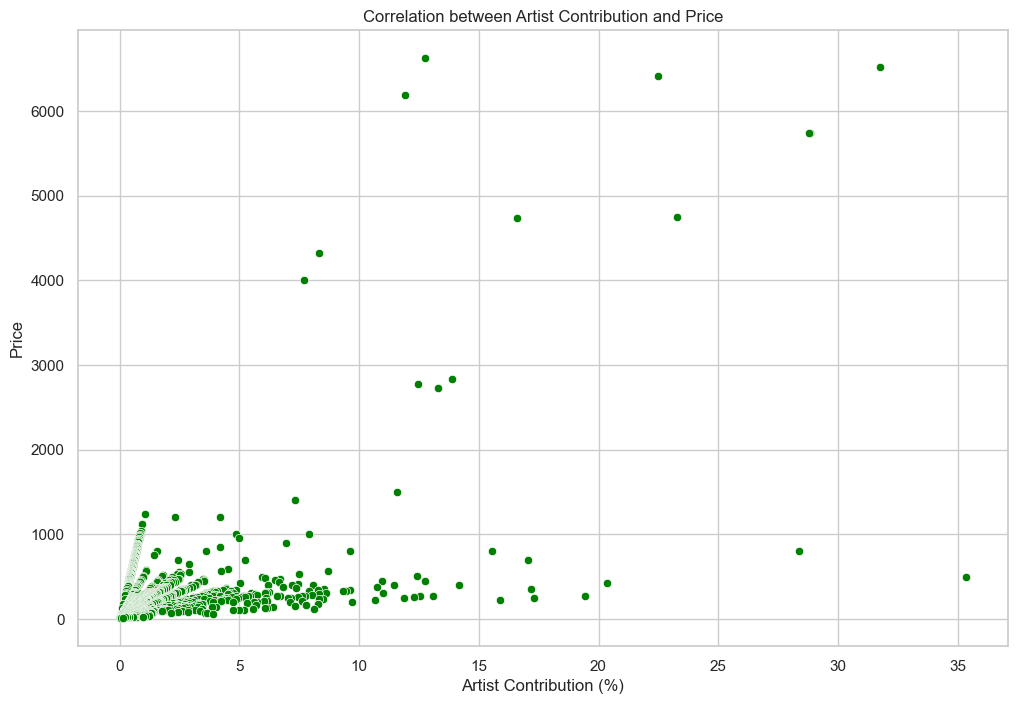

In [20]:
# Calculate Artist's Total Revenue
artist_total_revenue = df.groupby('Artist')['Price'].sum().sort_values(ascending=False)

# Calculate Artist Contribution as a percentage of the Total Revenue
df['Artist_Contribution'] = (df['Price'] / df.groupby('Artist')['Price'].transform('sum')) * 100

# Scatter plot to visualize the relationship between Artist Contribution and Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Artist_Contribution', y='Price', data=df, color='green')
plt.title('Correlation between Artist Contribution and Price')
plt.xlabel('Artist Contribution (%)')
plt.ylabel('Price')
plt.show()

### 7.3 Correlation Heatmap for Multiple Features

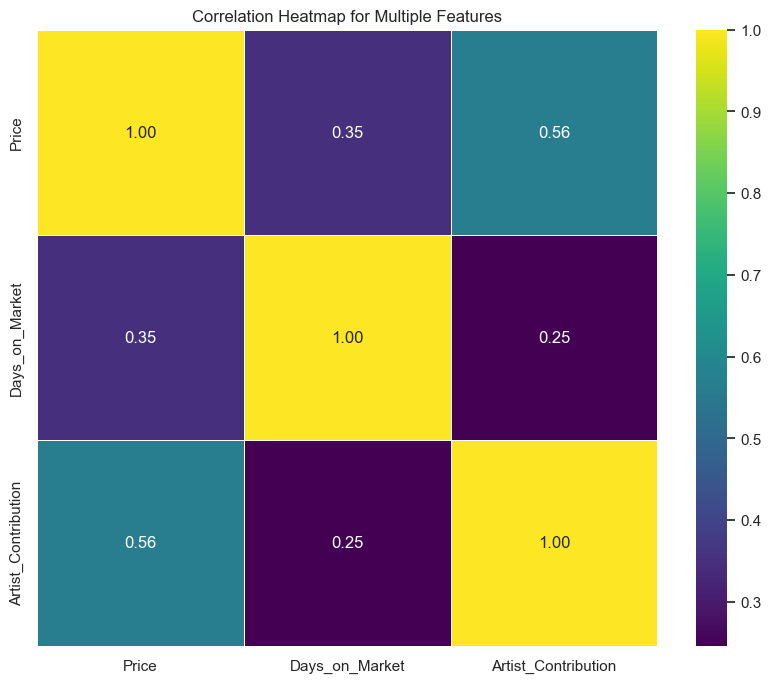

In [21]:
# Calculate correlation matrix for multiple features
features = df[['Price', 'Days_on_Market', 'Artist_Contribution']]
multiple_correlation_matrix = features.corr()

# Heatmap to visualize the correlation matrix for multiple features
plt.figure(figsize=(10, 8))
sns.heatmap(multiple_correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for Multiple Features')
plt.show()

## 8. Hypothesis Testing for Key Business Metrics:

### 8.1 Days on Market vs. Price:

- H₀: There is no significant correlation between the price of artworks and the days they spend on the market.
- H₁: There is a significant correlation between the price of artworks and the days they spend on the market.

In [22]:
# Calculate Pearson correlation coefficient
corr_coefficient, p_value_days_price = stats.pearsonr(df['Price'], df['Days_on_Market'])

# Interpretation
if p_value_days_price < 0.05:
    print("Reject H₀: There is a significant correlation between price and days on market.")
else:
    print("Fail to reject H₀.")

Reject H₀: There is a significant correlation between price and days on market.


In [23]:
p_value_days_price

4.34132583241938e-80

### 8.2 Artist Contribution vs. Price

- H₀: The price of an artwork does not significantly impact the artist's contribution percentage.-  H₁: The price of an artwork significantly influences the artist's contribution percentage


In [24]:
# Perform regression analysis
regression_model = LinearRegression().fit(df[['Price']], df['Artist_Contribution'])

# Interpretation
if not all(np.isclose(regression_model.coef_, 0)):
    print("Reject H₀: Price significantly influences artist contribution.")
else:
    print("Fail to reject H₀.")

Reject H₀: Price significantly influences artist contribution.


### 8.3 Artist Contribution vs. Days on Market:

- H₀: There is no significant relationship between the days an artwork spends on the market and the artist's contribution percentage.
- H₁: There is a significant relationship between the days an artwork spends on the market and the artist's contribution percentage.

In [25]:
# Calculate correlation coefficient
corr_coefficient, p_value_days_contrib = stats.pearsonr(df['Days_on_Market'], df['Artist_Contribution'])

# Interpretation
if p_value_days_contrib < 0.05:
    print("Reject H₀: There is a significant relationship between days on market and artist contribution.")
else:
    print("Fail to reject H₀.")

Reject H₀: There is a significant relationship between days on market and artist contribution.


In [26]:
p_value_days_contrib

7.503406973045262e-39

In [27]:
df.to_csv('WALRUS_soldinventory_clean.csv')

## 9. Business Implications:

### 9.1 Days on Market vs. Price:

The significant correlation between the price of artworks and the days they spend on the market implies that higher-priced artworks may take longer to sell. This could influence inventory management and pricing strategies. Businesses might consider targeted marketing or promotional events for high-priced artworks to reduce their time on the market.

### 9.2 Artist Contribution vs. Price:

The rejection of the null hypothesis suggests that the price of an artwork significantly influences the artist's contribution percentage. Businesses can leverage this insight to negotiate favorable terms with artists based on the pricing strategy. It also opens avenues for collaborative pricing decisions that benefit both the business and the artists.

### 9.3 Artist Contribution vs. Days on Market:

The significant relationship between the days an artwork spends on the market and the artist's contribution percentage indicates that the speed of sales might impact the artist's earnings. Businesses can strategize to optimize both the pricing and marketing of artworks to maximize contributions to artists.

### 9.4 Next Steps:

#### Predictive Analytics:

Building predictive models could enhance business decision-making. Predictive analytics can forecast the potential days on market for new artworks based on their characteristics. This allows for proactive inventory management and targeted marketing efforts.

#### Fine-Tuning Pricing Strategies:

Continuously monitor the correlation between price and days on market. Fine-tune pricing strategies based on market trends, competitor analysis, and customer preferences to optimize sales performance.

#### Artist Relationship Management:

Further explore the dynamics of artist contributions and their relationship with sales. Develop strategies to nurture artist relationships, ensuring mutual benefit and incentivizing artists to create high-quality, marketable artworks.

#### Customer Behavior Analysis:

Dig deeper into customer behavior to understand preferences and buying patterns. This information can guide inventory selection, helping businesses stock artworks that align with customer tastes and lead to faster sales.

#### Seasonal Trends and Marketing:

Analyze historical data to identify seasonal trends in art sales. Adjust inventory and marketing strategies accordingly, offering promotions or themed collections during periods of increased demand.

By implementing these next steps, the business can enhance its operational efficiency, customer satisfaction, and overall profitability.


## 10. Conclusion:

In conclusion, the analysis of the art business dataset has provided valuable insights into the relationships between artwork price, days on market, and artist contribution. By implementing the recommended strategies, the business can optimize its operations, improve sales performance, and foster strong relationships with both artists and customers. Embracing a data-driven approach will position the business for sustained success in the dynamic art market.


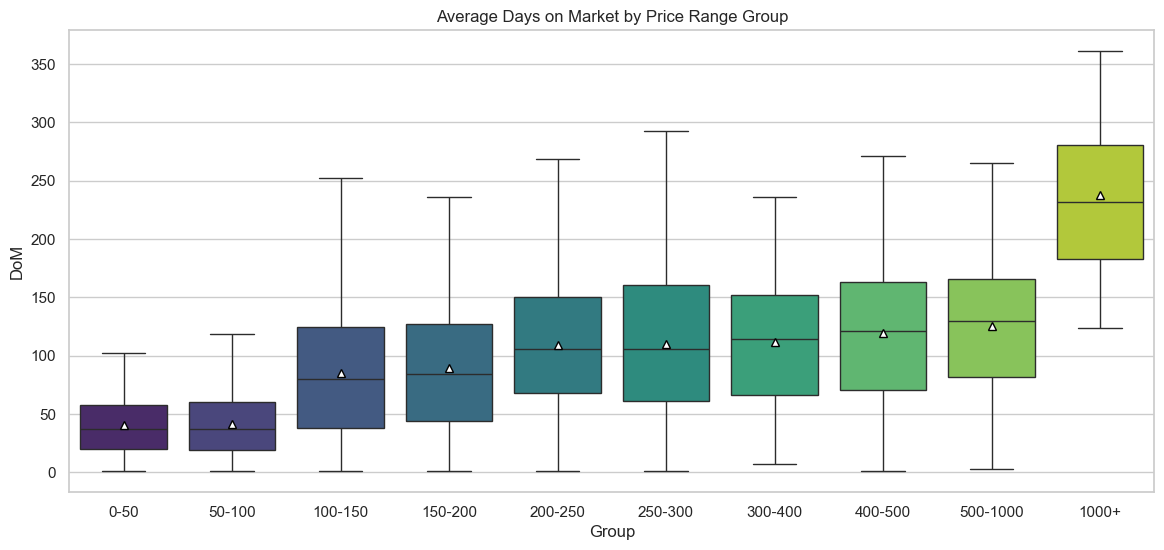

In [28]:
# Average Price by Price Range Group
plt.figure(figsize=(14, 6))
avg_DoM_by_price_range = df.groupby('Price_Range')['Days_on_Market'].mean().sort_values()
sns.boxplot(x=df['Price_Range'], y=df['Days_on_Market'], order=avg_DoM_by_price_range.index, hue=df['Price_Range'], palette='viridis', showfliers=False, showmeans=True, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"})
plt.title('Average Days on Market by Price Range Group')
plt.xlabel('Group')
plt.ylabel('DoM')
plt.show()

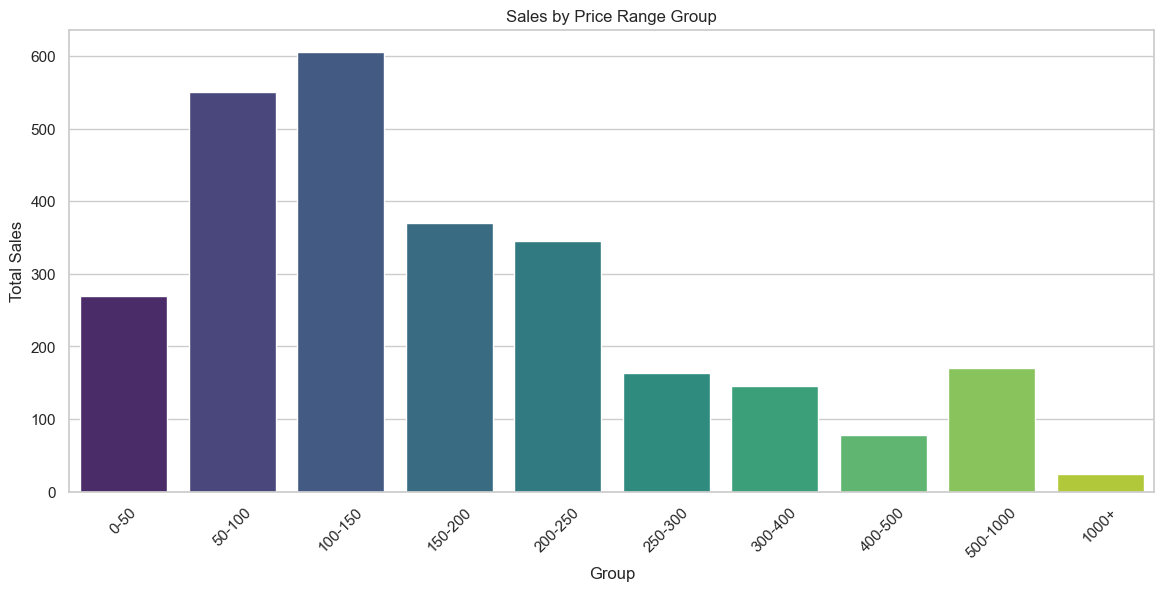

In [29]:
# Create a bar plot for the total sales in each price range
total_sales_by_price_range = df.groupby('Price_Range')['Price'].count().sort_values()
plt.figure(figsize=(14, 6))
sns.barplot(x=total_sales_by_price_range.index, y=total_sales_by_price_range.values, hue=total_sales_by_price_range.index, palette='viridis', legend=False)
plt.title('Sales by Price Range Group')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()